CNN Modeling is Done.


/home/otsukalab/.local/share/virtualenvs/reparam-cfaYz6qU/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in cosh
  return f_raw(*args, **kwargs)


Training Done.
e_time:26.449790716171265[s]
ds.design <class 'xarray.core.dataarray.DataArray'> <xarray.DataArray 'design' (model: 1, step: 58, z: 8, y: 8, x: 8)>
array([[[[[0.24227011, 0.2310175 , 0.14747673, ..., 0.33477664,
           0.41747102, 0.50706708],
          [0.32361847, 0.30836457, 0.16821411, ..., 0.35129088,
           0.26923448, 0.3933717 ],
          [0.31406391, 0.273451  , 0.21644303, ..., 0.33365297,
           0.29873067, 0.40379402],
          ...,
          [0.42945516, 0.37448648, 0.3696503 , ..., 0.27672726,
           0.31524849, 0.48693126],
          [0.60421151, 0.58343893, 0.64339012, ..., 0.44467187,
           0.44564256, 0.52132779],
          [0.51831496, 0.50188398, 0.49767655, ..., 0.61526054,
           0.67641139, 0.5481146 ]],

         [[0.29737926, 0.24963191, 0.11999488, ..., 0.37615177,
           0.46695611, 0.58586377],
          [0.35118869, 0.31055552, 0.11546576, ..., 0.32412949,
           0.30370677, 0.47293013],
          [0.2958900

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

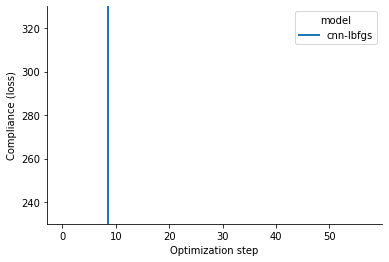

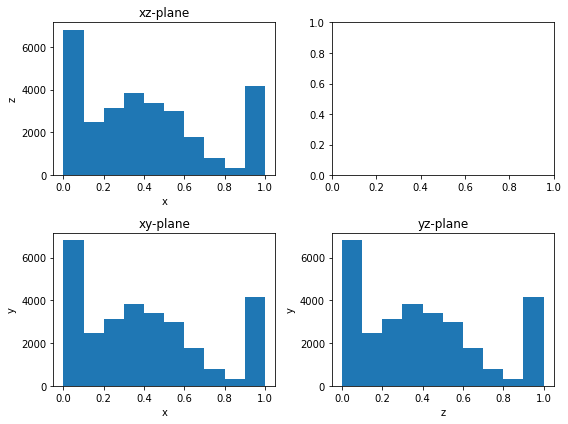

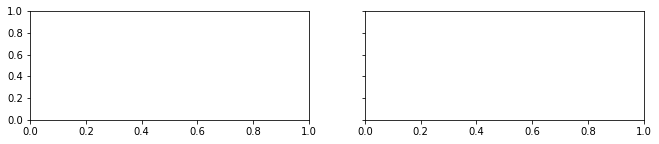

In [7]:
from IPython import display
from PIL import Image
import time
import seaborn
import matplotlib.pyplot as plt
import xarray
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np    #for check

from neural_structural_optimization import pipeline_utils
from neural_structural_optimization import problems
from neural_structural_optimization import models
from neural_structural_optimization import topo_api
from neural_structural_optimization import train

def train_all(problem, max_iterations, cnn_kwargs=None):
    args = topo_api.specified_task(problem)
    if cnn_kwargs is None:
        cnn_kwargs = {}

    model = models.CNNModel(args=args, **cnn_kwargs)
    print("CNN Modeling is Done.")
    ds_cnn = train.train_lbfgs(model, max_iterations)
    print("Training Done.")
    dims = pd.Index(['cnn-lbfgs'], name='model')
    return xarray.concat([ds_cnn], dim=dims)

"""MBB beam with a larger grid"""
problem = problems.PROBLEMS_BY_NAME['mbb_beam_8x8x8_0.4']
max_iterations = 100

# #%time ds = train_all(problem, max_iterations) %timeが機能しないため,以下の処理に変更
start = time.time()
ds = train_all(problem, max_iterations)
e_time = time.time() - start
print ("e_time:{0}".format(e_time) + "[s]")

##### Check #####
#np.set_printoptions(threshold=np.inf)
#print("ds.loss",ds.loss)
print("ds.design",type(ds.design),ds.design)
#print("ds.design.dims",ds.design.dims)
#################

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(230, 330)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()





ds.design.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='y', y='z', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='z', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=2, aspect=0.5,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)